In [47]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('inputs/temperature_history.csv')
# Create lagged features for the past 7 days
for i in range(1, 8):
    df[f'Temp_{i}d_ago'] = df['Temperature'].shift(i)
df.dropna(inplace=True)

In [56]:
# Define features and target for the MLP
X_mlp = df[[f'Temp_{i}d_ago' for i in range(1, 8)]]
y_mlp = df['Temperature']

# Splitting the data for training and testing
train_size_mlp = int(0.8 * len(X_mlp))
X_train_mlp, X_test_mlp = X_mlp[:train_size_mlp], X_mlp[train_size_mlp:]
y_train_mlp, y_test_mlp = y_mlp[:train_size_mlp], y_mlp[train_size_mlp:]
# Randomly split the data into training and testing sets
# X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
#     X_mlp, y_mlp, test_size=0.2, random_state=42)  # random_state for reproducibility


# Train the MLP
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train_mlp, y_train_mlp)
mlp_pred = mlp.predict(X_test_mlp)

# Implementing the Median Baseline
# Calculate the median of the last 7 days for each day in the test set
median_baseline_pred = X_test_mlp.median(axis=1)

# Calculate Mean Absolute Error (MAE) for MLP predictions
mlp_mae = mean_absolute_error(y_test_mlp, mlp_pred)

# Calculate Mean Absolute Error (MAE) for Median Baseline predictions
median_baseline_mae = mean_absolute_error(y_test_mlp, median_baseline_pred)

print(f'MLP Mean Absolute Error: {mlp_mae}')
print(f'Median Baseline Mean Absolute Error: {median_baseline_mae}')



MLP Mean Absolute Error: 0.7156081761048987
Median Baseline Mean Absolute Error: 2.8318650999366395


In [61]:
print(np.mean(np.abs(y_test_mlp)))

12.631012614480733


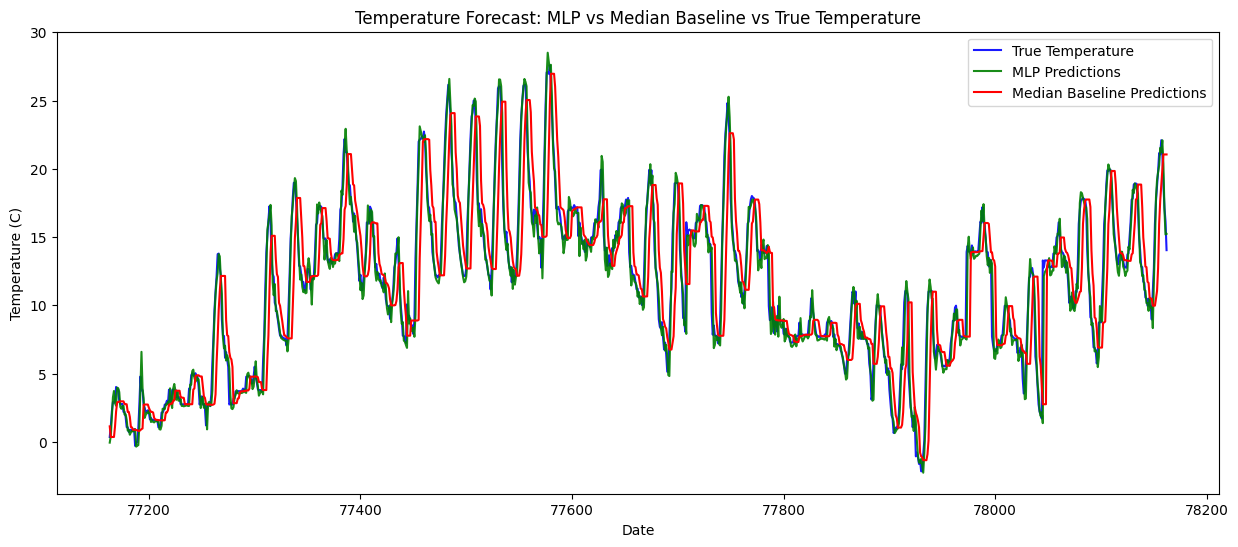

In [65]:

# Plotting the Results
plt.figure(figsize=(15, 6))
plt.plot(y_test_mlp.index[:1000], y_test_mlp[:1000], label='True Temperature', color='blue', alpha=0.9)
plt.plot(y_test_mlp.index[:1000], mlp_pred[:1000], label='MLP Predictions', color='green', alpha=0.9)
plt.plot(y_test_mlp.index[:1000], median_baseline_pred[:1000], label='Median Baseline Predictions', color='red')
plt.title('Temperature Forecast: MLP vs Median Baseline vs True Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()



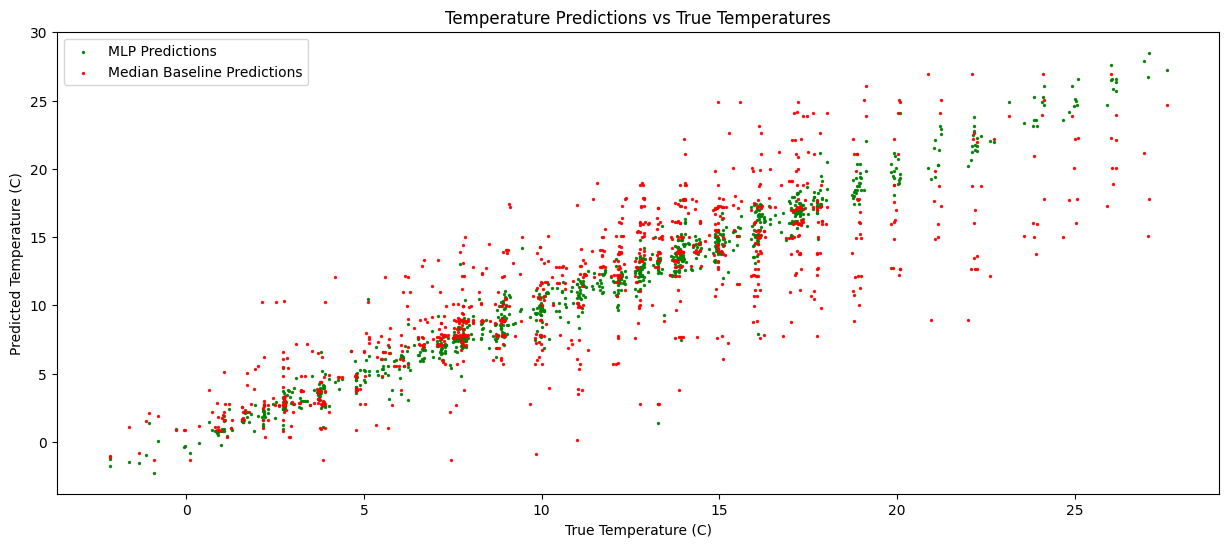

In [63]:
# Adjusting the plot to have true temperatures on the x-axis and predictions on the y-axis
plt.figure(figsize=(15, 6))
plt.scatter(y_test_mlp[:1000], mlp_pred[:1000], label='MLP Predictions', color='green', alpha=0.9, s=2)
plt.scatter(y_test_mlp[:1000], median_baseline_pred[:1000], label='Median Baseline Predictions', color='red', alpha=0.9, s=2)
plt.title('Temperature Predictions vs True Temperatures')
plt.xlabel('True Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.legend()
plt.show()
